# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('07-x_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('07-x_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('07-y_train-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('07-y_test-IEMOCAP_RAVDESS-CONRUIDO-dato_audioopensmile.xlsx',index_col=0)

In [3]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
1985,0.237848,-12.455758,22.268440,0.013656,-0.002091,0.061581,27.550224,-3.736580,17.892195,-16.777225,...,8.377280,626.772583,1403.625244,-107.736900,1645.360718,1143.465454,-111.592857,2671.746338,1004.007019,-114.019333
1042,0.096896,-13.843244,21.239864,-0.007048,0.002401,0.023190,27.083162,-1.019235,17.894165,-6.893274,...,3.565492,652.476868,1419.516357,-169.802216,1668.297729,1174.426392,-172.371796,2655.321777,986.865784,-172.744980
891,0.094784,-11.840569,21.069407,0.001850,0.005101,0.019105,28.198374,-1.272566,17.340811,-8.333536,...,2.678742,604.521301,1383.009766,-177.168015,1601.044312,1132.944702,-178.804657,2613.465088,978.313721,-179.433060
2368,0.772420,-0.070994,10.824004,0.051507,-0.002395,0.535654,-2.203439,-20.699806,0.303819,-8.678863,...,2.122530,866.370056,791.071350,-99.321312,1820.155151,823.039062,-96.771736,2875.385742,717.851624,-99.692520
2074,0.172442,-11.409821,21.529724,0.009324,-0.000772,0.037949,31.996679,-5.258129,17.367472,-9.374699,...,10.828529,565.174438,1352.151978,-118.090340,1543.467041,1099.524658,-121.926437,2580.887695,990.506042,-125.792488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.425805,-10.971887,20.394451,0.012249,-0.003465,0.135793,28.821161,-2.237694,18.211691,-11.256765,...,10.130011,541.355591,1303.519531,-108.097961,1520.017944,1032.616943,-110.971992,2595.402588,844.526855,-114.891777
835,0.084810,-13.789702,21.320992,-0.000025,0.006677,0.017291,25.605879,1.201977,23.603409,-7.546015,...,5.550917,608.902283,1421.750977,-148.870880,1643.862793,1232.202881,-154.884354,2580.996826,1020.791443,-154.421249
1653,0.324884,-8.966864,15.459266,0.030614,-0.013499,0.071405,31.701395,-13.652279,19.450703,-17.031677,...,10.727306,632.111450,1327.302856,-72.570068,1665.952759,1054.103149,-78.750412,2641.186523,915.443909,-80.430267
2607,0.109740,-7.783916,16.402441,0.097945,0.001171,0.028816,14.209499,9.044527,3.686414,-3.086620,...,11.567903,558.507446,1049.913574,-128.958603,1453.107666,872.218933,-135.258713,2457.144287,765.537231,-139.242706


# **SELECCION DE CARACTERISTICAS**

In [4]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **BALANCEO DE DATOS**

In [5]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [6]:
overs = RandomOverSampler()

In [7]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [8]:
y_t_overs

,Emociones
0,2
1,3
2,3
3,1
4,2
...,...
3763,3
3764,3
3765,3
3766,3


# **MODELO DE MARCHINE LEARNING**

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)

clf.fit(x_t_overs, y_t_overs) 

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [10]:
#para generar 300 un nuevo modelo y guardar el que tiene mayor accuracy
from sklearn import metrics
mayor=0
for i in range(600):
  overs = RandomOverSampler()
  overs.fit(x_train, y_train)
  x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

  clf = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
  clf.fit(x_t_overs, y_t_overs)
  y_predict = clf.predict(x_test)
  predicion = metrics.accuracy_score(y_test, y_predict)
  if predicion >mayor:
    mayor= predicion
    modelo = clf
  print(f" prueba :{i} PRECISION ====  {metrics.accuracy_score(y_test, y_predict)} ")
clf= modelo

 prueba :0 PRECISION ====  0.5284974093264249 
 prueba :1 PRECISION ====  0.542314335060449 
 prueba :2 PRECISION ====  0.6044905008635578 
 prueba :3 PRECISION ====  0.6269430051813472 
 prueba :4 PRECISION ====  0.5768566493955095 
 prueba :5 PRECISION ====  0.5768566493955095 
 prueba :6 PRECISION ====  0.5854922279792746 
 prueba :7 PRECISION ====  0.5993091537132987 
 prueba :8 PRECISION ====  0.5785837651122625 
 prueba :9 PRECISION ====  0.5889464594127807 
 prueba :10 PRECISION ====  0.5716753022452504 
 prueba :11 PRECISION ====  0.5906735751295337 
 prueba :12 PRECISION ====  0.5785837651122625 
 prueba :13 PRECISION ====  0.5544041450777202 
 prueba :14 PRECISION ====  0.5958549222797928 
 prueba :15 PRECISION ====  0.5440414507772021 
 prueba :16 PRECISION ====  0.5630397236614854 
 prueba :17 PRECISION ====  0.5647668393782384 
 prueba :18 PRECISION ====  0.5699481865284974 
 prueba :19 PRECISION ====  0.5215889464594128 
 prueba :20 PRECISION ====  0.5699481865284974 
 pr

In [11]:
y_predict = clf.predict(x_test)
y_predict

array([0, 3, 3, 0, 3, 0, 2, 0, 1, 0, 2, 2, 0, 3, 3, 1, 3, 3, 2, 3, 1, 0,
       3, 2, 3, 1, 2, 2, 2, 0, 2, 2, 2, 2, 3, 0, 2, 1, 2, 3, 2, 2, 0, 3,
       1, 2, 3, 3, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2,
       2, 2, 0, 2, 3, 1, 3, 2, 1, 0, 2, 3, 2, 2, 0, 2, 3, 3, 2, 0, 0, 2,
       2, 2, 3, 2, 0, 0, 3, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 3,
       3, 1, 1, 2, 2, 3, 2, 2, 3, 1, 2, 2, 3, 0, 3, 1, 3, 1, 3, 3, 0, 3,
       0, 2, 3, 3, 3, 2, 2, 1, 0, 2, 3, 3, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2,
       3, 2, 2, 2, 1, 3, 2, 3, 2, 1, 3, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 0,
       0, 0, 3, 0, 3, 0, 2, 1, 3, 3, 0, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2,
       3, 2, 2, 2, 0, 1, 0, 2, 3, 2, 3, 0, 3, 3, 3, 1, 0, 2, 2, 1, 3, 2,
       1, 2, 0, 3, 2, 3, 3, 2, 2, 0, 0, 2, 3, 2, 3, 3, 0, 1, 3, 2, 0, 1,
       2, 2, 2, 2, 3, 3, 0, 0, 0, 3, 3, 0, 0, 1, 2, 2, 1, 3, 3, 1, 2, 2,
       1, 3, 2, 2, 2, 1, 0, 0, 3, 3, 2, 3, 3, 3, 3, 1, 2, 2, 3, 3, 3, 2,
       0, 2, 3, 2, 3, 2, 0, 2, 3, 0, 3, 2, 0, 3, 2,

# **EVALUACION**

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        83
           1       0.40      0.25      0.31        96
           2       0.68      0.67      0.68       241
           3       0.66      0.75      0.70       159

    accuracy                           0.63       579
   macro avg       0.58      0.59      0.58       579
weighted avg       0.61      0.63      0.62       579



In [13]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.59      0.70      0.64        83
           1       0.40      0.25      0.31        96
           2       0.68      0.67      0.68       241
           3       0.66      0.75      0.70       159

    accuracy                           0.63       579
   macro avg       0.58      0.59      0.58       579
weighted avg       0.61      0.63      0.62       579

Matriz de confusión, sin normalización
[[ 58   8  14   3]
 [ 30  24  37   5]
 [ 10  14 162  55]
 [  1  14  24 120]]


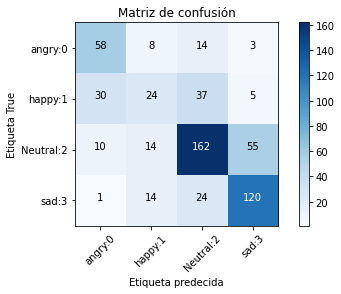

In [14]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')